In [1]:
import math
import numpy as np
import pandas as pd
from tqdm import tqdm

from patsy import dmatrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette("bright")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
x = np.linspace(0., 1., 100)

# Various Degree Splines

In [30]:
y0 = dmatrix("bs(x, df=6, degree=0, include_intercept=True) - 1", {"x": x})
y1 = dmatrix("bs(x, df=6, degree=1, include_intercept=True) - 1", {"x": x})
y2 = dmatrix("bs(x, df=6, degree=2, include_intercept=True) - 1", {"x": x})
y3 = dmatrix("bs(x, df=6, degree=3, include_intercept=True) - 1", {"x": x})

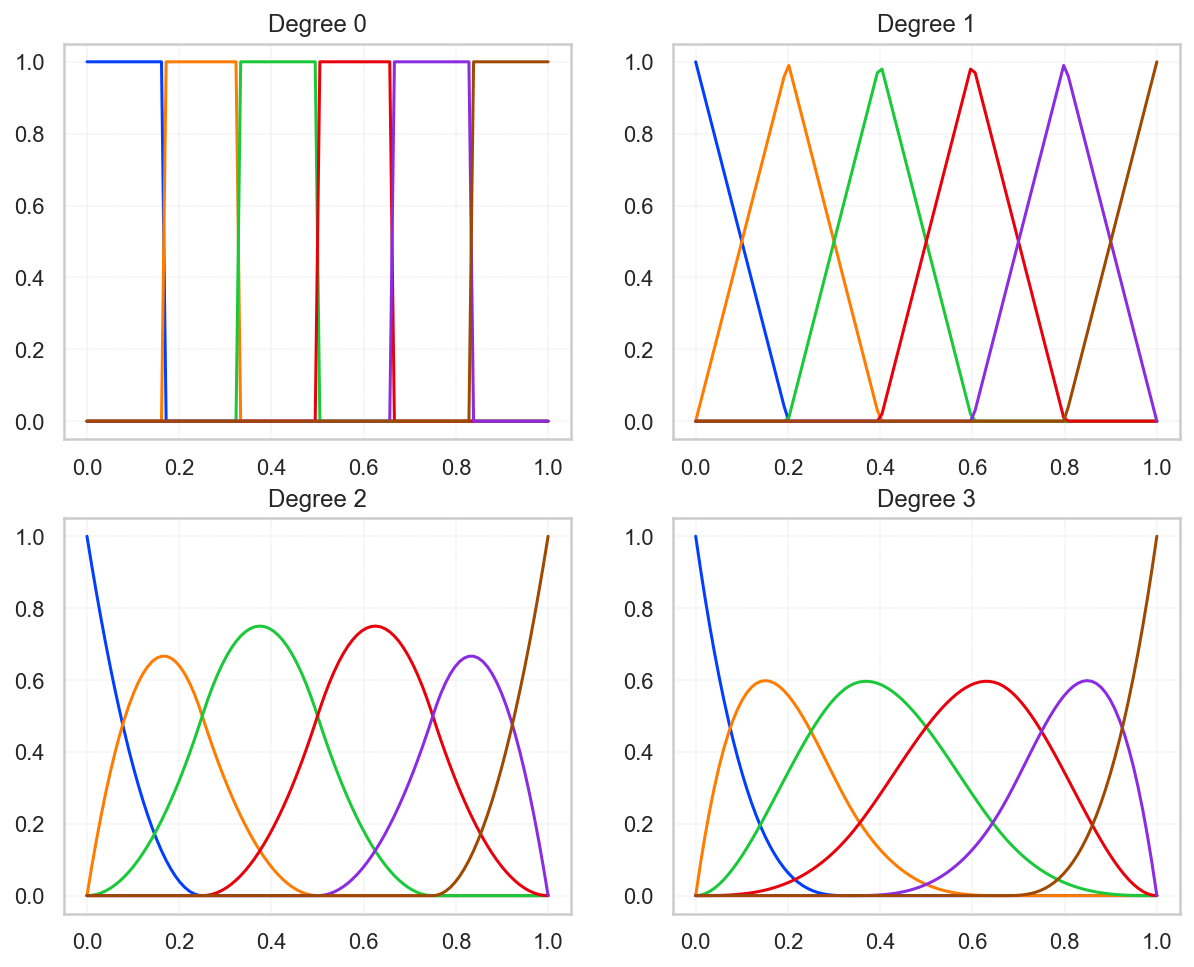

In [79]:
f, ax = plt.subplots(2, 2, figsize=(10, 8))
ax[0][0].plot(x, y0)
ax[0][0].grid(linestyle='--', linewidth='0.2')
ax[0][0].set_title('Degree 0')
ax[0][1].plot(x, y1)
ax[0][1].grid(linestyle='--', linewidth='0.2')
ax[0][1].set_title('Degree 1')
ax[1][0].plot(x, y2)
ax[1][0].grid(linestyle='--', linewidth='0.2')
ax[1][0].set_title('Degree 2')
ax[1][1].plot(x, y3)
ax[1][1].grid(linestyle='--', linewidth='0.2')
ax[1][1].set_title('Degree 3');
f.savefig('images/chapter_02_various_degree_splines.png', dpi=220, bbox_inches='tight');
f.savefig('images/chapter_02_various_degree_splines.svg', format='svg', dpi=220, bbox_inches='tight');

# Linear Combination of Cubic Splines

In [41]:
y3 = dmatrix("bs(x, df=6, degree=3, include_intercept=True) - 1", {"x": x})

In [46]:
b0 = np.array([1, 1, 1, 1, 1, 1])
b1 = np.array([1.1, 0.4, 0.9, 0.8, 1.8, 0.6])

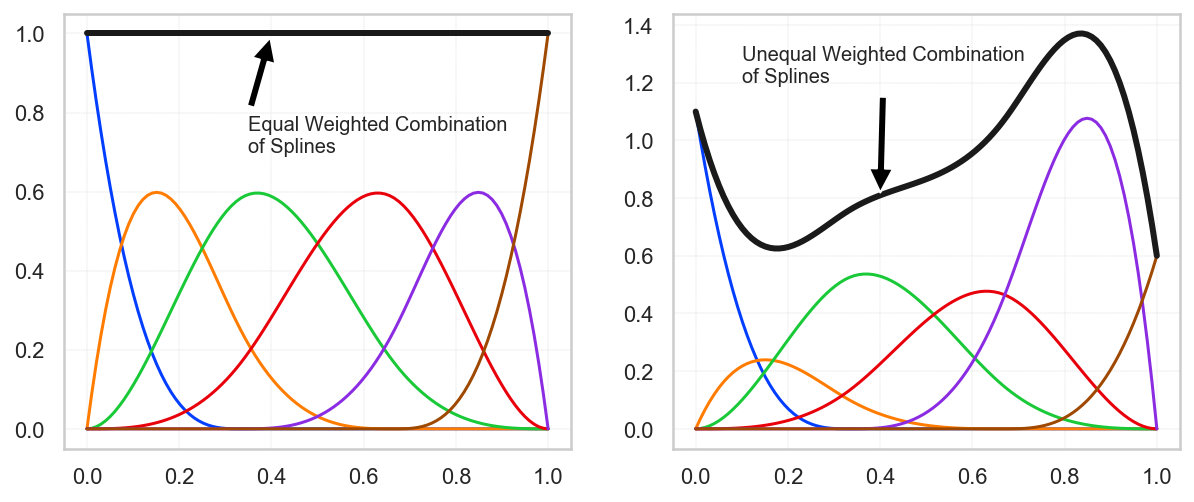

In [78]:
f, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(x, y3*b0)
ax[0].plot(x, np.dot(y3, b0), color='k', linewidth=3)
ax[0].annotate('Equal Weighted Combination\nof Splines', xy=(0.4, 1), xytext=(0.35, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax[0].grid(linestyle='--', linewidth='0.2')
ax[1].plot(x, y3*b1)
ax[1].plot(x, np.dot(y3, b1), color='k', linewidth=3)
ax[1].grid(linestyle='--', linewidth='0.2')
ax[1].annotate('Unequal Weighted Combination\nof Splines', xy=(0.4, 0.8), xytext=(0.1, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            );
f.savefig('images/chapter_02_linear_comb_cubic_splines.png', dpi=220, bbox_inches='tight');
f.savefig('images/chapter_02_linear_comb_cubic_splines.svg', format='svg', dpi=220, bbox_inches='tight');